# Principal Component Analysis (PCA)

The data might be *redundant* (e.g. one variable may carry similar information as another variable, or that the information covered by a set of variables may overlap) or *noisy* (some dimensions may not carry any useful information and their variation might be due to noise). 


PCA is a way to deal with such situations: it finds a linear orthogonal projection of the data into orthogonal basis (determined by the SVD) with the following properties 
- has the minimum redundancy 
- preserves the variance in the data 

PCA helps us to identify the intrinsic dimensionality of the data  and lower dimensional representation of the data with the smallest reconstruction error. 


<div>
<img src="assets/pca-1.PNG" width="300"/> &nbsp;  <img src="assets/pca-2.PNG" width="295"/> 
<br/>
source: https://www.mathworks.com/help/stats/regress.html
</div>

As can be seen from the figures above, the PCA picks the direction with the largest variance. 


## Applications of SVD/PCA

- Dimensionality Reduction 
- Latent Semantic Indexing




### Covariance 

Often we might be interested in how two quantities vary together – their **covariance**. If we have a number of quantities whose covariances are of interest, you can assemble a covariance matrix. Each entry $σ_{ij}$ is the covariance between variable $x_i$ and the variable $x_j$. Since $σ_{ij}=σ_{ji}$, the covariance matrix is symmetric.

Suppose $X$ is a vector of random variables, e.g. 

$$ 
\begin{bmatrix}
\text{age} \\ 
\text{height} \\ 
\text{weight} \\
\end{bmatrix}
$$

The covariance matrix of $X$ is given by 

$$
V = \mathbb{E} \big[  (X - \overline{X}) (X - \overline{X})^T \big]
$$


Recall from your probability theory course that the covariance matrix is a square matrix whose $ij$ entry is given by 
$V_{i,j} = \sigma(x_i, x_j)$ where $\sigma(x_i, x_j)$ is the covariance of the variable $x_i$ with the variable $x_j$ and  $\sigma(x_i, x_i) = \sigma^2 (x_i)$ is the variance of the $i$-th variable $x_i$.  

For instance if we only have two variables $x$ and $y$, 

$$ 
V = \begin{bmatrix} 
\sigma(x,x)  & \sigma(x, y)   \\ 
\sigma(y,x) & \sigma(y,y) \\
\end{bmatrix}
$$

The **sample covariance matrix** is the discrete version of the general formula above: 

$$S = \frac{1}{N-1} \sum^{N}_{i=1}{(X_i-\bar{X})(X_i-\bar{X})^T}$$ 

Note the difference between $V$ and $E$ is fundamental: $V$ is computed from the expected valued of a joint probability distribution (e.g. expected values from a future trial) whereas $S$ is computed from the sample values (e.g. of a survey or a past trial). 






Principal component analysis is mathematically simply the act of finding the eigenvectors and eigenvalues of the covariance matrix. 

Since the covariance matrix is symmetric, the Spectral Theorem will tell us that when all the eigenvalues are distinct, the eigenvectors are actually all orthogonal.






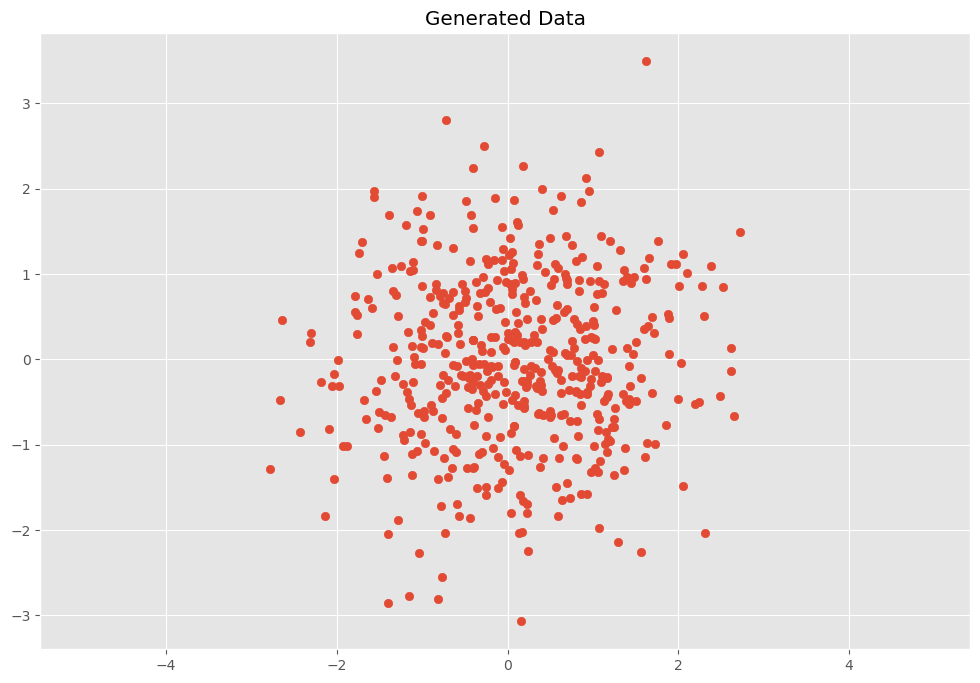

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

In [4]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[1.02322804, 0.02324137],
       [0.02324137, 1.10252133]])

### A Simple Example 

Suppose we have measured the height and weight of 7 students on campus and we arrange the measurements into a $6 \times 2$ matrix $A_0$ whose two columns represent the ages and heights (in cm). The 6 rows corresponds to the number of students in our sample. 

$$
A_0 = \begin{bmatrix}
24  & 181 \\
17 &  168  \\ 
28 & 182 \\ 
22 & 173 \\ 
17 & 173 \\ 
18 & 181 \\  
\end{bmatrix}
$$


$$
\begin{bmatrix}
24 & 17 & 28 & 22 & 17 & 18   \\
181 & 168 & 182 & 173 & 173 & 181  
\end{bmatrix}
$$

First, we center the matrix around the mean of the columns (i.e. subtract the mean of each column from the entries of that column). The centered matrix $A$ has two columns each of which has mean $0$. The mean of the first column is $21$ and the mean of the second column is $174$. 

$$
A = 
\begin{bmatrix}
24 - 21 & 181 -174 \\
17 -21 &  168  -174\\ 
28 - 21 & 182 -174\\ 
22 - 21 & 173 -174\\ 
17 - 21 & 173 -174\\ 
18 - 21 & 181 -174 \\  
\end{bmatrix}
= 
\begin{bmatrix}
3 & 7 \\
-4  &  -6 \\ 
7 & 8  \\ 
1 & -1 \\ 
-4 & -1 \\ 
-3 & 7 \\  
\end{bmatrix}
$$

Sometimes we use the concise notation $A_0 - \overline{A_0}$ for the centered matrix $A$. In this example 

$$
\overline{A_0} = 
\begin{bmatrix}
21 & 174 \\
21  & 174 \\ 
21 & 174  \\ 
21 & 174 \\ 
21 & 174 \\ 
21 & 174 \\  
\end{bmatrix}
$$


The first right singular vector of $A$ finds the best line through $(0,0)^T$ near which the data is **clustered**. 


The first right singular vector is the largest eigenvalue of the $2 \times 2$ matrix $A^T A$. For a general $n \times d$ matrix $A_0$ we have 